<a href="https://colab.research.google.com/github/ariel-hedvat/data_science_projects/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

# get the data

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
url = "https://raw.githubusercontent.com/ariel-hedvat/data_science_projects/master/housing.csv"
df = pd.read_csv(url)
df_copy = df.copy()

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

median_house_value is the label!

* every row is a house blook (not a singel house)

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* 20,640 instances
* total_bedrooms have nulls
* all are numeric, except ocean_proximity

In [7]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


plot a histogram for each numerical attribute:

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

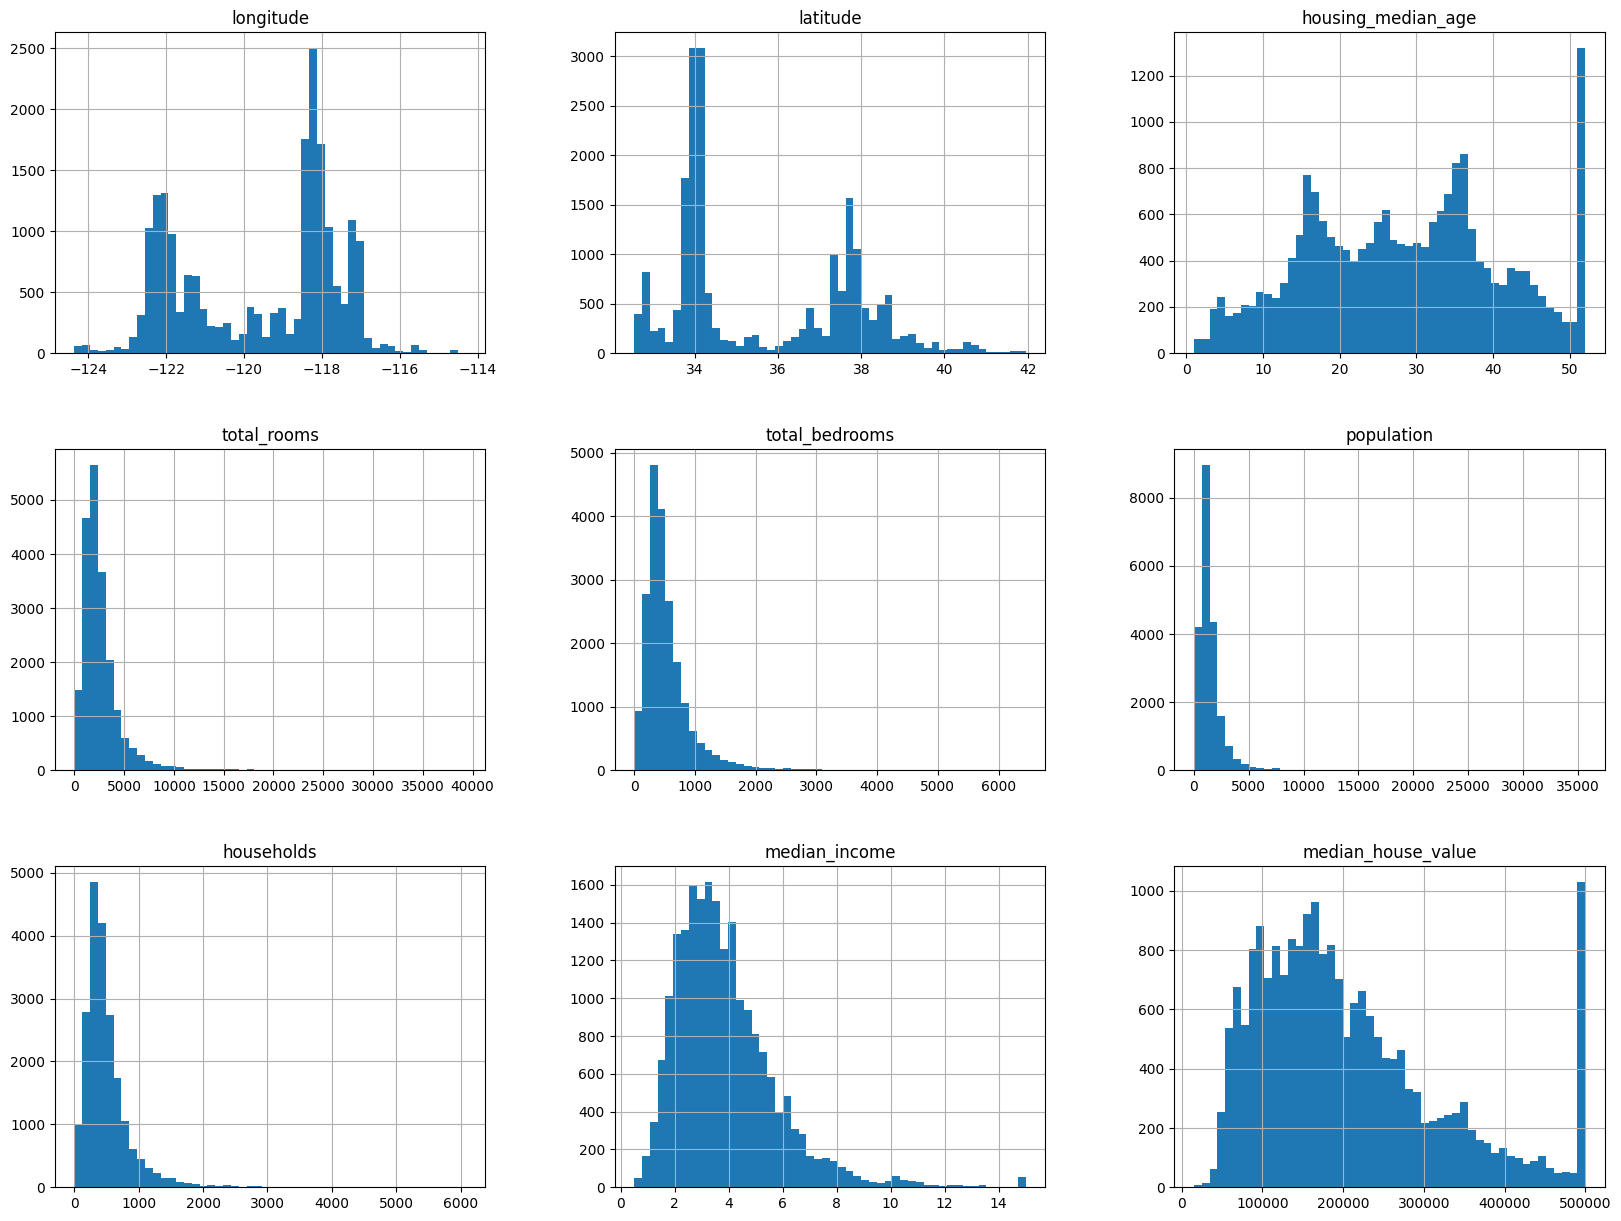

In [9]:
df.hist(bins=50, figsize=(20,15))

* we can do log and see if the feature look more 'normal'
* also, need to complete missing vals for total_bedrooms

In [10]:
min(df["total_bedrooms"]), max(df["total_bedrooms"])

(1.0, 6445.0)

there are not 0 in total_bedrooms, lets see the median.

<Axes: >

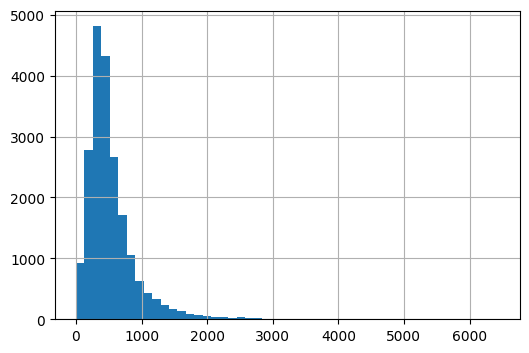

In [11]:
median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median).hist(bins=50, figsize=(6,4))

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [13]:
cat_features = ["ocean_proximity"]

cate

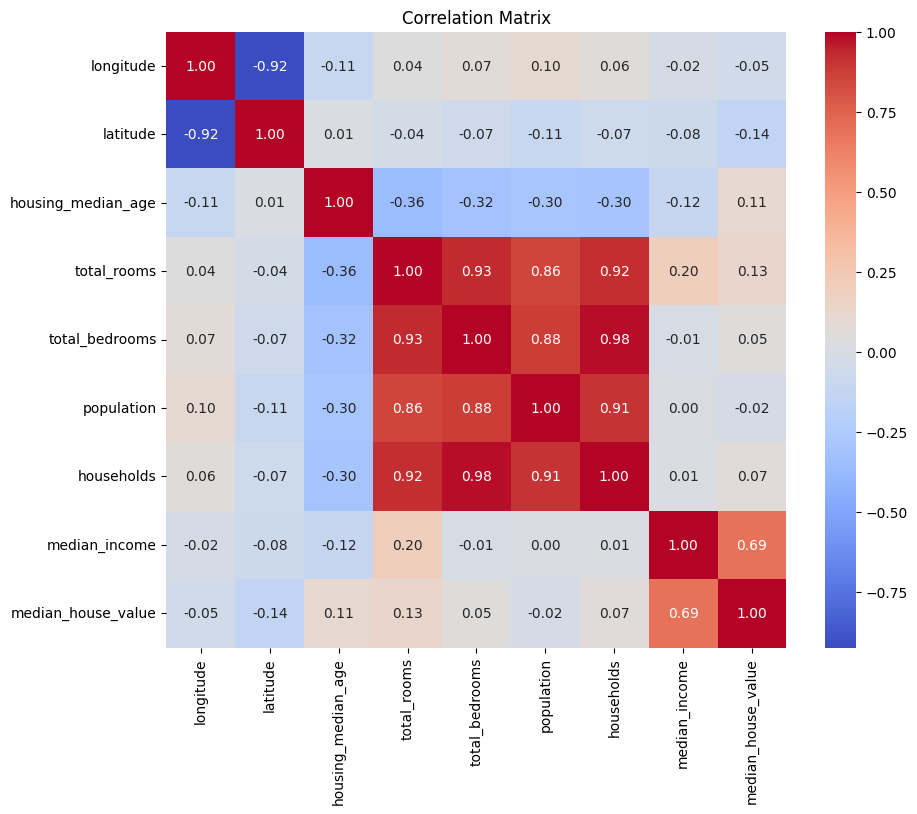

In [14]:
# Correlation Analysis Example
corr = df[numerical_cols].corr() # Compute Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* combine lat and lon into a single feature
* keep toal_rooms and remove total_bedrooms
* remove population

# train test split

In [15]:
# 1) Create categories (bins) from the continuous dominant feature for stratification
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# 2) Stratified split based on the binned dominant feature
train_set, test_set = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["income_cat"]
)

# 3) Separate features/target (example target: median_house_value)
target = "median_house_value"

X_train = train_set.drop(columns=[target, "income_cat"])
y_train = train_set[target]

X_test = test_set.drop(columns=[target, "income_cat"])
y_test = test_set[target]

# pre processing

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [17]:
# one hot encoder
dummy_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # OneHotEncoder not works with nulls
])

In [18]:
# missing vals
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# with median
total_bedrooms_missing_pipeline = Pipeline([
                                    # add_indicator=True will append a binary indicator column for missingness.
                                    # We'll treat it as "has_income" (1 = was missing, 0 = was not missing) in later feature naming/analysis.
                                    ('imputer', SimpleImputer(strategy='median', add_indicator=True))
                                    ])

* pipeline flow

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linreg_preprocessor = ColumnTransformer([
    ('dummy', dummy_pipeline, cat_features),
    ('total_bedrooms_missing', total_bedrooms_missing_pipeline, ['total_bedrooms'])

], remainder='passthrough')

In [21]:
models = {
    'Linear Regression': LinearRegression()
}

preprocessors = {
    'Linear Regression': linreg_preprocessor
}

In [22]:
# Integrate preprocessing and model in a pipeline
pipelines = {}
for name, model in models.items():
    preprocessor = preprocessors.get(name, linreg_preprocessor)  # Default to logreg_preprocessor if not found
    pipelines[name] = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

In [23]:
# Example: Fit all models and compare
results = {}
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    results[name] = pipe.score(X_test, y_test) # .score is acuuracy for classification and r^2 for regression
print('Model Scores:', results)

Model Scores: {'Linear Regression': 0.6520647199374996}


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

for name, pipe in pipelines.items():
    print(f'\n=== {name} ===')
    y_pred = pipe.predict(X_test)
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R2 Score:', r2_score(y_test, y_pred))


=== Linear Regression ===
MSE: 4534692747.128131
RMSE: 67340.12731743333
MAE: 49770.89944548701
R2 Score: 0.6520647199374996
